<h1 style="text-align:center"> TRAVESSIAS </h1>
<p>A travessia de um grafo consiste em um processo sistemático de visitar todos os seus vértices. As duas travessias mais comuns se diferenciam pela ordem que os vértices são visitados: <br><br>
1- Busca em Profundidade (Depth First Search (DFS)) Visita-se os vértices filhos antes de visitar os vértices irmãos<br>
2- Busca em Largura (Breadth First Search (BFS)) Visita-se os vértices irmãos antes de visitar os vértices filhos<br><br>
Os dois algoritmos iniciam com a escolha de um vértice raiz (root) e em ambos os casos cria uma árvore que corresponde a forma e ordem que os demais vértices são acessados.
</p>  
<p>DFS e BFS visitam todos os vértices de um grafo caso exista um caminho entre todos eles. Com isso, esses algoritmos podem ser utilizados para verificar a existência e quantidade de componentes conexos em um grafo. Componentes conexos são como ilhas em um arquipélago. A Rede 3 usada nesse notebook é um grafo composto por 2 componentes conexos<p>

<p>
    As aplicações mais comuns de travessias são:
    <ul>
        <li>Encontrar um caminho entre dois vértices ou afirmar com segurança que não existe caminho entre eles </li>
        <li>Calcular todos os caminhos possíveis entre todos os vértices</li>
        <li>Verificar se um grafo é conectado. Verificar a quantidade de componentes conexos existentes</li>
        <li> Verificar a existência de ciclos </li>
    </ul>

</p>

<p>Abaixo são exibidos exemplos dessas travessias e aplicações usando o NetworkX</p>  
  
<br>  
  
<p style="font-size:10px; font-weight:bold">Material feito por Rodrigo Henrique Ramos - ramos@ifsp.edu.br</p> 

In [1]:
#Importação das bibliotecas/pacote e dos datasets
import pandas as pd #Dataframes
import networkx as nx #redes
import matplotlib.pyplot as plt #gráficos
import warnings # Para não mostrar warnings. Deixa o notebook mais limpo
warnings.filterwarnings('ignore')

#Vou criar um dicionário com todos os "inputs". Cada arquivo é uma lista de aresta, que irei transformar em dataframe
listaArestaDF = {}
listaArestaDF["rede1"] = pd.read_csv("datasets/rede1.tsv",sep="	") #tsv = Tab Separed Value, por isso o 	
listaArestaDF["rede2"] = pd.read_csv("datasets/rede2.tsv",sep="	")
listaArestaDF["rede3"] = pd.read_csv("datasets/rede3.tsv",sep="	")
listaArestaDF["rede4"] = pd.read_csv("datasets/rede4.tsv",sep="	")

#Crio redes no networkx para cada lista de aresta:
listaRedesNX = {}
#Observem que estou criando um dicionário (listaRedesNX) para armazenar as 4 redes que temos. 
#Vejam também que uso a mesma chave do listaArestaDF para acessar o dataframe e criar um novo elemento em listaRedesNX
for key in listaArestaDF:
    listaRedesNX[key] = nx.from_pandas_edgelist(listaArestaDF[key],source="FROM",target="TO")
    

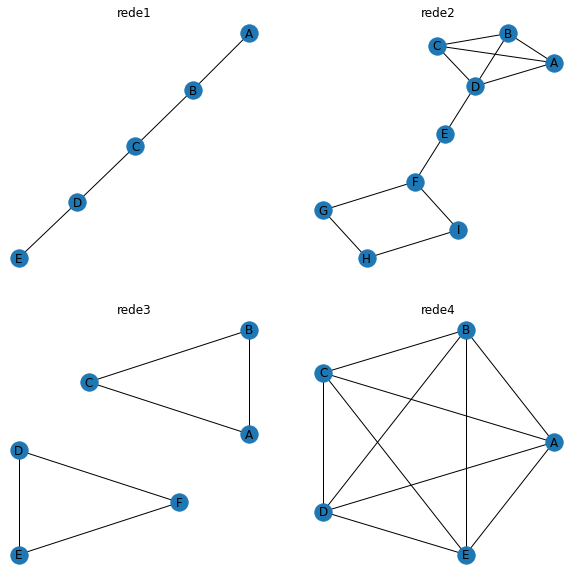

In [2]:
#Exibo as as redes que usaremos.
#Vou imprimir as quatro redes usando o a biblioteca plt.
fig, ax = plt.subplots(2,2,figsize=(10, 10)) # crio uma figura (fig) que separo em 4 parte chamadas de subplots (2,2), tipo matriz 2x2. ax vai ser utilizado para referenciar as posições dessa "matriz"

#As minhas redes estão em uma lista (listaRedesNX) e eu quero exibir elas em uma "matriz 2x2". Vou percorrer a lista e dinamicamente acessar os indices da "matriz"
linha=0
coluna=0
for rede in listaRedesNX:
    if(coluna==2): #Esse 2 é hardcoded mas serve pq sei qtas redes tenho. Se não soubesse teria que melhorar a lógica
        coluna=0
        linha+=1
    # Seleciono a posicao do subplot, add titulo e o plot
    plt.sca(ax[linha,coluna])
    ax[linha,coluna].set_title(rede)
    ax[linha,coluna] = nx.draw_kamada_kawai(listaRedesNX[rede],with_labels=True)    
    coluna+=1
    
#Exibo o gráfico
plt.show()

<h1 style="text-align:center;"> CÓDIGO MANUAL </h1>
<p>Vou usar as funções que desenvolvemos no outro notebook referente a Lista de Adjacência e criar novas funções. As funções DFS e BFS eu vou fazer e as outras vocês fazem baseado nessas duas. Em caso de dúvida, me mandem mensagem</p>

<h2>Armazenando em Lista de Adjacencia - Funções</h2>

In [3]:
#Recebe uma Lista de Aresta armazenada em um data frame e retorna um lista de adjacência como dicionario
def deListaArestaParaListaAdjacencia(pandasListaAres):
    # A lista de aresta tem duas colunas FROM e TO. Vou criar uma lista para cada uma
    listaFrom =[]
    listaTo =[]
    # separo o retorno de iterrows() em indice e o resto da linha e acesso cada valor pelo nome da coluna
    for index, row in pandasListaAres.iterrows():
        listaFrom.append(row['FROM'])
        listaTo.append(row['TO'])     
    
    todosVerticesSemRepeticao = set(listaFrom + listaTo)
    # Agora transformo o SET em LIST para pode acessar os indices :) e ordeno, pq o SET bagunça a ordem original
    todosVerticesSemRepeticao = sorted(list(todosVerticesSemRepeticao))
    
    #Cada vertice será uma chave no dic e seus vizinhos serão o valor (lista)
    listaAdjacencia = {}
    for v in todosVerticesSemRepeticao:
        #O vertice pode aparecer na lista FROM e/ou TO. Sempre que ele aparecer tenho que pegar o vertice do outro "lado"
        #Procuro nas duas listas o vertice atual, qdo acho pego o indice e busco o correspondente na outra lista e guardo como vizinhos
        vizinhos = []
        for indice in range(0,len(listaFrom)):            
            if listaFrom[indice]==v:
                vizinhos.append(listaTo[indice])
            if listaTo[indice]==v:
                vizinhos.append(listaFrom[indice])
        listaAdjacencia[v] = vizinhos
    
    return listaAdjacencia


def getGrauPorVerticeAdjacencia(listaAdjacencia):
    #para manter o padrão vou retornar um lista de tupla
    retorno = []
    for v in listaAdjacencia:
        retorno.append((v,len(listaAdjacencia[v])))
        
    return retorno   

def getVizinhosAdjacencia(listaAdjacencia):
    #A lista de adjacencia já é uma lista de vizinhos, então fica bem fácil esse
    #Vou manter o formado da NX e retornar lista de tupla
    retorno = []
    for v in listaAdjacencia:
        retorno.append((v,listaAdjacencia[v]))
        
    return retorno  

def temArestaAdjacencia(listaAdjacencia,v1,v2):
    #verfica se v2 existe nos vizinhos de v1
    return (v2 in listaAdjacencia[v1])     

<h2>Funções Novas - Travessias</h2>

In [4]:
#recebe um grafo armazenado como Lista de Adjacência e imprime a ordem dos vértices
#Esse algoritmo está em sua forma mais tradicional. 
def bfs_printOrder(G,root):
    listaVisitandos=[]
    listaVisitados=[]
    #visito a raiz
    print(root, end="->")
    #Marco a raiz como visitada
    listaVisitados.append(root)
    #Marco os vizinhos da raiz como itens a se visitar
    for v in G[root]:
        listaVisitandos.append(v)
    
    #Eqto existir itens que ainda não foram visitados, continuo visitando
    while(len(listaVisitandos)>0):
        #Aqui que temos o primeiro "pulo do gato". listaVisitandos é uma Fila. Eu coloco itens no fim e tiro do começo
        atual = listaVisitandos[0]#Pego o primeiro da fila
        listaVisitandos.remove(atual)#Removo o elemento da fila. 
        print(atual, end="->")#visito o atual
        #marco o item atual como visitado
        listaVisitados.append(atual)
        #Aqui temos o segundo "pulo do gato". Só posso adicionar os vizinhos do atual na Fila, se o vizinho n estiver em visitandos e nem em visitados
        for v in G[atual]:
            if(v not in listaVisitados and v not in listaVisitandos):
                listaVisitandos.append(v)
    print("\n")
        

In [5]:
#recebe um grafo armazenado como Lista de Adjacência e retorna uma lista de aresta que corresponde a ordem da travessia
#Esse algoritmo é a forma mais tradicional, porém é a forma que o networkX faz, então para manter um padrão vou fazer igual
#Como é retornado aresta, eu preciso guardar informação sobre que é o Pai do Atual, para fazer aresta assim: (Pai,Atual)
#A função de cima está bem comentada. Nessa irei comentar só as linhas novas em relação a função de cima
def bfs_edgelist(G,root):
    retornoListaAresta=[] # linha nova
    listaVisitandos=[]
    listaVisitados=[]
    listaVisitados.append(root)
    for v in G[root]:
        listaVisitandos.append(v)
        retornoListaAresta.append((root,v)) # linha nova
    
    while(len(listaVisitandos)>0):        
        atual = listaVisitandos[0]
        listaVisitandos.remove(atual)
        listaVisitados.append(atual)
        for v in G[atual]:
            if(v not in listaVisitados and v not in listaVisitandos):
                listaVisitandos.append(v)
                retornoListaAresta.append((atual,v)) # linha nova
                
    return retornoListaAresta

In [6]:
#Busca em profundidade no estilo tradicional
#Entenda primeiro a BFS, pois aqui explico comparando com ela
def dfs_printOrder(G,root):
    listaVisitandos=[]
    listaVisitados=[]
    #A grande diferença da BFS é que ao invés de visitar todos os vizinhos de um vértice, é visitado o primeiro vizinho de cada vizinho, até n ter mais vizinhos. Nesse caso, "voltamos" para quem chamou a execução atual e pegamos o segundo vizinhos
    #A lógica da DFS é recursiva, por isso uso duas funcões. A vantagem de usar recursão é que o processo de "voltar" (backtrack) é feito no próprio processo de empilhamento de chamadas de função
    dfs_printOrder_recursion(G,root,listaVisitandos,listaVisitados)
    print("\n")
    
def dfs_printOrder_recursion(G,atual,listaVisitandos,listaVisitados):
    #marca o atual como visitando
    listaVisitandos.append(atual)
    #visito o atual
    print(atual, end="->")
    for v in G[atual]:
        #Marca o vizinho como visitando, caso n esteja em nenhuma lista
        if(v not in listaVisitados and v not in listaVisitandos):
            listaVisitandos.append(v)
            #Antes de adicionar o próximo vizinho, pega os vizinhos do visual atual
            dfs_printOrder_recursion(G,v,listaVisitandos,listaVisitados)#recusão :)
            
    #Qdo chega na "folha da árvore". Ou seja, não tem como descer mais nesse "ramos" do grafo
    listaVisitados.append(atual)
                

In [7]:
#Busca em profundidade no estilo networkX
#Só vou comentar o que for diferente da função de cima

def dfs_edgelist(G,root):
    retornoListaAresta=[] # linha nova
    listaVisitandos=[]
    listaVisitados=[]
    dfs_edgelist_recursion(G,root,listaVisitandos,listaVisitados,retornoListaAresta) # Parametro novo
    return retornoListaAresta
 
    
def dfs_edgelist_recursion(G,atual,listaVisitandos,listaVisitados,retornoListaAresta):
    listaVisitandos.append(atual)
    for v in G[atual]:
        if(v not in listaVisitados and v not in listaVisitandos):
            listaVisitandos.append(v)
            retornoListaAresta.append((atual,v)) # linha nova
            dfs_edgelist_recursion(G,v,listaVisitandos,listaVisitados,retornoListaAresta) # Parametro novo
            
    listaVisitados.append(atual)
                

<h2>Main</h2>

In [8]:
#Crio um grafo usando a "nossa função", que recebe uma lista de aresta armazenada em um pandas data frame
#Caso não lembre qual é arede "rede2", veja o desenho dela no começo no notebook
grafoManual = deListaArestaParaListaAdjacencia(listaArestaDF["rede2"])

#Para facilitar a comparação, vou fazer a travessia nesse grafo usando os mesmos vertices usados com o networkx: A e C
print("\n====Busca em Largura no grafo Rede 2\n")
bfs_printOrder(grafoManual,'A')
bfs_printOrder(grafoManual,'C')
print(bfs_edgelist(grafoManual,'A'))
print(bfs_edgelist(grafoManual,'C'))

print("\n====Busca em Profundidade no grafo Rede 2\n")
dfs_printOrder(grafoManual,'A')
dfs_printOrder(grafoManual,'C')
print(dfs_edgelist(grafoManual,'A'))
print(dfs_edgelist(grafoManual,'C'))

#Estou considerando que vocês fizeram as travessias da rede Maze no papel. Então vou aplicar os algoritmos nessa rede tb
#A rede maze foi criada direto no networkX e o nosso método de Lista de Adjacência só aceita dataframe. 
#Vou transformar a rede Maze em um pandas edgelist e passar para a nossa função

mazePandasEdgeList = nx.to_pandas_edgelist(maze,source='FROM',target='TO',)

grafoManualMaze = deListaArestaParaListaAdjacencia(mazePandasEdgeList)

print("\n====Busca em Largura no grafo Maze\n")
print(bfs_edgelist(grafoManualMaze,1))
print(bfs_edgelist(grafoManualMaze,4))

print("\n====Busca em Profundidade no grafo Maze\n")
print(dfs_edgelist(grafoManualMaze,1))
print(dfs_edgelist(grafoManualMaze,4))



====Busca em Largura no grafo Rede 2

A->B->C->D->E->F->G->I->H->

C->A->B->D->E->F->G->I->H->

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H')]
[('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('F', 'I'), ('G', 'H')]

====Busca em Profundidade no grafo Rede 2

A->B->C->D->E->F->G->H->I->

C->A->B->D->E->F->G->H->I->

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]
[('C', 'A'), ('A', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I')]


NameError: name 'maze' is not defined

<h2>Encontrando componentes conexos</h2>
<p>Não se preocupem com o código da célula debaixo. <br>
O importante é que agora o dicionário 'listaArestaDF', possui mais duas novas listas de arestas (cc1 e cc2), além das 4 tradicionais 4 redes usadas.
</p>

==============================Novo Grafo CC1


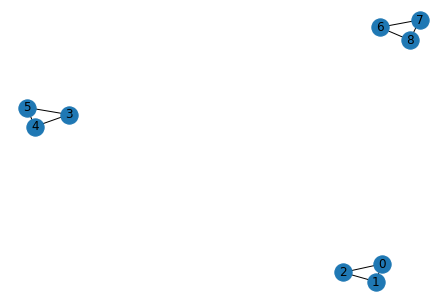

==============================Novo Grafo CC2


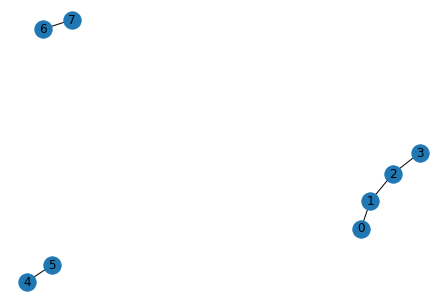

In [9]:
cc1 = nx.caveman_graph(3,3)
plt.figure()
print("==============================Novo Grafo CC1")
nx.draw(cc1,with_labels=True)
plt.show()

cc2 = nx.caveman_graph(4,2)
cc2.add_edge(1,2)
plt.figure()
print("==============================Novo Grafo CC2")
nx.draw(cc2,with_labels=True)
plt.show()

listaArestaDF["cc1"] = nx.to_pandas_edgelist(cc1,source='FROM',target='TO')
listaArestaDF["cc2"] = nx.to_pandas_edgelist(cc2,source='FROM',target='TO')

In [10]:
def componenteConexo(G):
    listaVertices = list(G.keys())
    qtdeCC=0
    while(len(listaVertices)>0):
        root = listaVertices[0]                
        retornoListaAresta=[] # linha nova
        listaVisitandos=[]
        listaVisitados=[]
        listaVisitados.append(root)
        listaVertices.remove(root)
        for v in G[root]:
            listaVisitandos.append(v)
            retornoListaAresta.append((root,v)) # linha nova

        while(len(listaVisitandos)>0):        
            atual = listaVisitandos[0]
            listaVisitandos.remove(atual)
            listaVisitados.append(atual)
            listaVertices.remove(atual)
            for v in G[atual]:
                if(v not in listaVisitados and v not in listaVisitandos):
                    listaVisitandos.append(v)
                    retornoListaAresta.append((atual,v)) # linha nova
        qtdeCC+=1
        print("Componente ",qtdeCC,'=',retornoListaAresta)

In [23]:
G = deListaArestaParaListaAdjacencia(listaArestaDF["rede1"])
componenteConexo(G)

Componente  1 = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]


In [11]:
G = deListaArestaParaListaAdjacencia(listaArestaDF["rede3"])
componenteConexo(G)

Componente  1 = [('A', 'B'), ('A', 'C')]
Componente  2 = [('D', 'E'), ('D', 'F')]


In [12]:
G = deListaArestaParaListaAdjacencia(listaArestaDF["cc2"])
componenteConexo(G)

Componente  1 = [(0, 1), (1, 2), (2, 3)]
Componente  2 = [(4, 5)]
Componente  3 = [(6, 7)]
